In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('../Dataset/data_historic_tmp.csv')
df['Date'] = pd.to_datetime(df['Date'])
most_recent_date = df['Date'].max()
subset = df[df['Date'] == most_recent_date][['Ticker', 'Close']]
subset.head()

,Ticker,Close
0,ADBE,633.66
64,ADP,236.68
128,ABNB,140.55
192,ALGN,217.47
256,GOOGL,132.52


In [3]:

df2 = pd.read_csv("../Dataset/data_tmp.csv")
subset2 = df2[['Ticker','Sector', 'Stock_Price', 'Market_Cap']]
subset2.head()

,Ticker,Sector,Stock_Price,Market_Cap
0,ADBE,Information Technology,624.34,2.885100e+11
1,ADP,Industrials,236.49,9.735000e+10
2,ABNB,Consumer Discretionary,142.09,9.008000e+10
3,ALGN,Health Care,221.48,1.666000e+10
4,GOOGL,Communication Services,132.73,NaN


In [4]:
import pandas as pd

# Assuming you have two DataFrames: subset and subset2

# Iterate through each row in subset DataFrame
for index, row in subset.iterrows():
    # Find the value in 'Ticker' column of subset
    ticker_value = row['Ticker']
    
    # Find matching rows in subset2 based on 'Ticker' column
    matching_rows = subset2[subset2['Ticker'] == ticker_value]
    
    # If there is a match, update 'Close' column in subset2
    if not matching_rows.empty:
        # Assuming there's only one matching row, you can take the first one
        close_value = row['Close']
        
        # Update 'Close' column in subset2 with the found 'Close' value from subset
        subset2.loc[matching_rows.index, 'Close'] = close_value

# Display subset2 after updating 'Close' column
print(subset2)


    Ticker                  Sector  Stock_Price    Market_Cap   Close
0     ADBE  Information Technology       624.34  2.885100e+11  633.66
1      ADP             Industrials       236.49  9.735000e+10  236.68
2     ABNB  Consumer Discretionary       142.09  9.008000e+10  140.55
3     ALGN             Health Care       221.48  1.666000e+10  217.47
4    GOOGL  Communication Services       132.73           NaN  132.52
..     ...                     ...          ...           ...     ...
96     WBD  Communication Services        11.16  2.739000e+10   11.23
97    WDAY  Information Technology       276.01  7.279000e+10  276.75
98     XEL               Utilities        61.86  3.375000e+10   61.16
99      ZM  Information Technology        69.68  2.170000e+10   71.28
100     ZS  Information Technology       211.74  3.126000e+10  210.76

[101 rows x 5 columns]


/tmp/ipykernel_433295/370207239.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2.loc[matching_rows.index, 'Close'] = close_value


In [5]:
# Create 'delta' column
subset2['Delta'] = subset2['Stock_Price'] - subset2['Close']

# Create 'Change' column as percentage change
subset2['Change'] = (subset2['Delta'] / subset2['Close']) * 100

subset2.head()

/tmp/ipykernel_433295/3385783359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2['Delta'] = subset2['Stock_Price'] - subset2['Close']
/tmp/ipykernel_433295/3385783359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2['Change'] = (subset2['Delta'] / subset2['Close']) * 100


,Ticker,Sector,Stock_Price,Market_Cap,Close,Delta,Change
0,ADBE,Information Technology,624.34,2.885100e+11,633.66,-9.32,-1.470820
1,ADP,Industrials,236.49,9.735000e+10,236.68,-0.19,-0.080277
2,ABNB,Consumer Discretionary,142.09,9.008000e+10,140.55,1.54,1.095695
3,ALGN,Health Care,221.48,1.666000e+10,217.47,4.01,1.843932
4,GOOGL,Communication Services,132.73,NaN,132.52,0.21,0.158467


/tmp/ipykernel_433295/1725054009.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_433295/1725054009.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



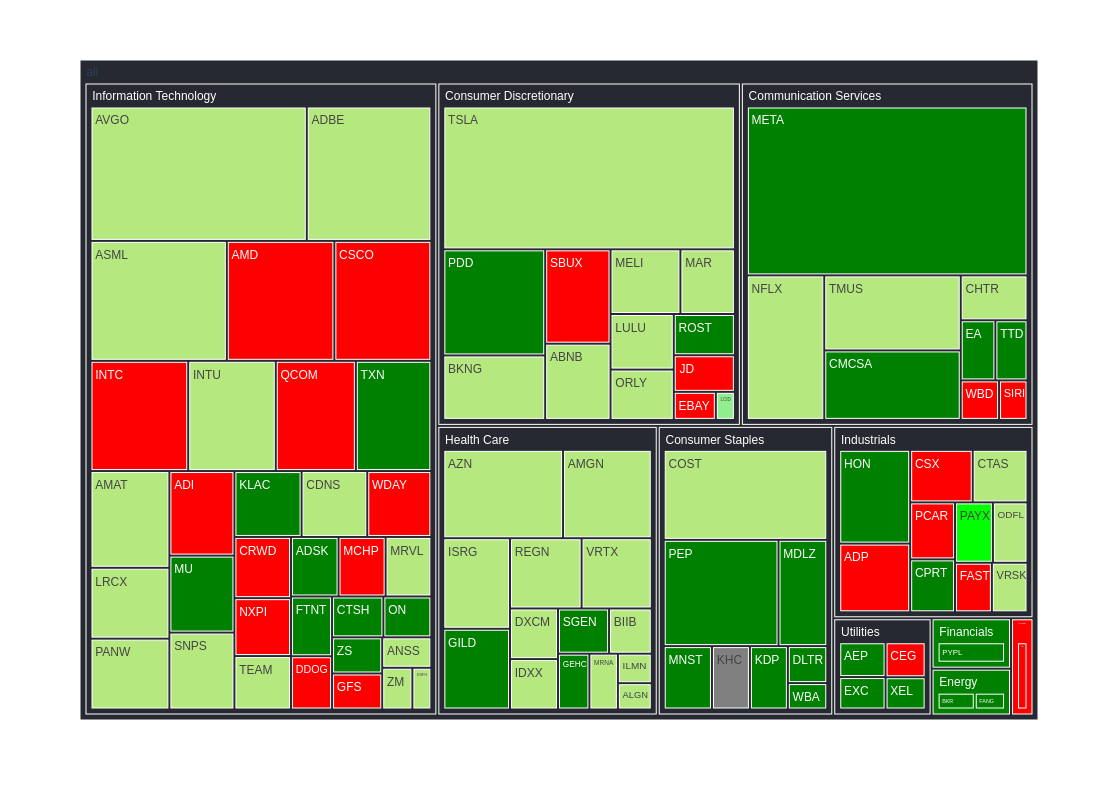

In [23]:
df = subset2
df['Market_Cap']=df['Market_Cap'].astype('float')
color_group = [-1,-0.02,-0.01,0, 0.01, 0.02,1]
df['colors'] = pd.cut(df['Delta'], bins=color_group, labels=['red','indianred','gray','lightgreen','lime','green'])
fig = px.treemap(df, path=[px.Constant('all'), 'Sector', 'Ticker'], values='Market_Cap',
                  color='colors', hover_data=['Delta'],
                  color_discrete_map={'(?)':'#262931', 'red':'red', 'indianred':'indianred','gray':'gray', 'lightgreen':'lightgreen','lime':'lime','green':'green'},
                 
                  #color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop'])
                )
fig.update_layout( width=600, height=800)
fig.show()